In [1]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
import math

In [2]:
############################################
#
# Varying parameter (others fixed to default)
#
var_name = 'N_ur'
var_min = 3.044
var_max = var_min + 1.
var_num = 5
var_legend = r'$N_\mathrm{eff}$'
var_figname = 'neff'
#
# Other parameter potentially varying together with the previous one
#
var2_name = 'omega_cdm'
var3_name = 'h'
#
# Constraints to be matched
#
# photon and neutrino density in reference LmabdaCDM with Neff=3.046:
# omega_gamma=2.472979e-05
# omega_ur=1.710730e-05
#
# coefficient such that omega_r = omega_gamma (1 + coeff*Neff),
# i.e. such that omega_ur = omega_gamma * coeff * Neff:
# coeff = omega_ur/omega_gamma/Neff_standard
coeff = 1.710730e-05/2.472979e-05/3.046
print ("coeff=",coeff)
#
# As explained in the "Neutrino cosmology" book, CUP, Lesgourgues et al., section 5.3, the goal is to vary
# - omega_cdm by a factor alpha = (1 + coeff*Neff)/(1 + coeff*3.046)
# - h by a factor sqrt*(alpha)
# in order to keep a fixed z_equality(R/M) and z_equality(M/Lambda)
#
#############################################
#
# Fixed settings
#
common_settings = {'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   # LambdaCDM parameters
                   #'h':0.67556,
                   'omega_b':0.022032,
                   #'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   'tau_reio':0.0925,
                   #'z_reio':11.3476867676,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   # other output and precision parameters
                   'P_k_max_1/Mpc':3.0,
                   'l_switch_limber':9}
                   #'background_verbose':1}  
#    
better_precision_settings = {
                            'recfast_Nz0':100000,
                            'tol_thermo_integration':1.e-5,
                            'recfast_x_He0_trigger_delta':0.01,
                            'recfast_x_H0_trigger_delta':0.01,
                            'evolver':0,
                            'k_min_tau0':0.002,
                            'k_max_tau0_over_l_max':3.,
                            'k_step_sub':0.015,
                            'k_step_super':0.0001,
                            'k_step_super_reduction':0.1,
                            'start_small_k_at_tau_c_over_tau_h': 0.0004,
                            'start_large_k_at_tau_h_over_tau_k': 0.05,
                            'tight_coupling_trigger_tau_c_over_tau_h':0.005,
                            'tight_coupling_trigger_tau_c_over_tau_k':0.008,
                            'start_sources_at_tau_c_over_tau_h': 0.006,
                            'l_max_g':50,
                            'l_max_pol_g':25,
                            'l_max_ur':50,
                            'tol_perturb_integration':1.e-6,
                            'perturb_sampling_stepsize':0.01,
                            'radiation_streaming_approximation':2,
                            'radiation_streaming_trigger_tau_over_tau_k':240.,
                            'radiation_streaming_trigger_tau_c_over_tau':100.,
                            'ur_fluid_approximation':2,
                            'ur_fluid_trigger_tau_over_tau_k':50.,
                            'l_logstep':1.026,
                            'l_linstep':25,
                            'hyper_sampling_flat':12.,
                            'hyper_nu_sampling_step':10.,
                            'hyper_phi_min_abs':1.e-10,
                            'hyper_x_tol':1.e-4,
                            'hyper_flat_approximation_nu':1.e6,
                            'q_linstep':0.20,
                            'q_logstep_spline':20.,
                            'q_logstep_trapzd':0.5,
                            'q_numstep_transition':250,
                            'transfer_neglect_delta_k_S_t0':0.17,
                            'transfer_neglect_delta_k_S_t1':0.05,
                            'transfer_neglect_delta_k_S_t2':0.17,
                            'transfer_neglect_delta_k_S_e':0.13,
                            'neglect_CMB_sources_below_visibility':1.e-30,
                            'transfer_neglect_late_source':3000.,
                            'l_switch_limber':40.,
                            'accurate_lensing':1,
                            'num_mu_minus_lmax':1000.,
                            'delta_l_max':1000.,
                            }    
#
#
# loop over varying parameter values
#
M = {}
#
for i in range(var_num):
    #
    # deal with varying parameters:
    #
    var = var_min + (var_max-var_min)*i/(var_num-1.)
    #
    alpha = (1.+coeff*var)/(1.+coeff*3.046)
    var2 = (0.022032 + 0.12038)*alpha - 0.022032
    var3 = 0.67556*math.sqrt(alpha)
    print (' * Compute with %s=%e, %s=%e, %s=%e'%(var_name,var,var2_name,var2,var3_name,var3))
    #
    #    
    # call CLASS
    #
    M[i] = Class()
    M[i].set(common_settings)
    #M[i].set(better_precision_settings)
    M[i].set({var_name:var})
    M[i].set({var2_name:var2})
    # either fix z_Lambda by varying h approrpiately:
    #M[i].set({var3_name:var3})
    # or fix theta_s by varying h differently (shooting):
    M[i].set({'100*theta_s': 1.042177649618803})
    M[i].compute()
    derived = M[i].get_current_derived_parameters(['z_reio','z_rec','100*theta_s'])
    print ('z_reio = ',derived['z_reio'])
    print ('z_rec = ',derived['z_rec'])
    print ('z_eq = ',M[i].Omega_m()/M[i].Omega_r())
    print ('Omega_Lambda',(M[i].Omega_Lambda()))
    print ('100*theta_s=',derived['100*theta_s'])


coeff= 0.2271073260480714
 * Compute with N_ur=3.044000e+00, omega_cdm=1.203418e-01, h=6.754693e-01
z_reio =  11.344879150390625
z_rec =  1089.2125349236442
z_eq =  3403.9649023358666
Omega_Lambda 0.6878595110223873
100*theta_s= 1.042176761851995
 * Compute with N_ur=3.294000e+00, omega_cdm=1.251212e-01, h=6.867134e-01
z_reio =  11.478240966796875
z_rec =  1089.668939134614
z_eq =  3403.964904750138
Omega_Lambda 0.6887639367569489
100*theta_s= 1.0421764933354976
 * Compute with N_ur=3.544000e+00, omega_cdm=1.299006e-01, h=6.977762e-01
z_reio =  11.608795166015625
z_rec =  1090.1184144115418
z_eq =  3403.9649070125165
Omega_Lambda 0.6896526052660708
100*theta_s= 1.0421766604320648
 * Compute with N_ur=3.794000e+00, omega_cdm=1.346801e-01, h=7.086664e-01
z_reio =  11.736541748046875
z_rec =  1090.561302477225
z_eq =  3403.9649091368988
Omega_Lambda 0.6905240932055998
100*theta_s= 1.0421765271516756
 * Compute with N_ur=4.044000e+00, omega_cdm=1.394595e-01, h=7.193918e-01
z_reio =  11.862

In [3]:
# Now with fixed Omega_m
#
#
# loop over varying parameter values
#
M2 = {}
#
for i in range(var_num):
    #
    # deal with varying parameters:
    #
    var = var_min + (var_max-var_min)*i/(var_num-1.)
    #
    alpha = (1.+coeff*var)/(1.+coeff*3.046)
    #var2 = (0.022032 + 0.12038)*alpha - 0.022032
    var3 = 0.67
    print (' * Compute with %s=%e, %s=%e, %s=%e'%(var_name,var,var2_name,var2,var3_name,var3))
    #
    #    
    # call CLASS
    #
    M2[i] = Class()
    M2[i].set(common_settings)
    #M[i].set(better_precision_settings)
    M2[i].set({var_name:var})
    M2[i].set({'omega_cdm':0.12})
    M2[i].set({var3_name:var3})
    # either fix z_Lambda vy varying h approrpiately:
    #M[i].set({var3_name:var3})
    # or fix theta_s by varying h differently (shooting):
    #M2[i].set({'100*theta_s': 1.042177649618803})
    M2[i].compute()
    derived = M2[i].get_current_derived_parameters(['z_reio','z_rec','100*theta_s'])
    print ('z_reio = ',derived['z_reio'])
    print ('z_rec = ',derived['z_rec'])
    print ('z_eq = ',M2[i].Omega_m()/M2[i].Omega_r())
    print ('Omega_Lambda',(M2[i].Omega_Lambda()))
    print ('100*theta_s=',derived['100*theta_s'])


 * Compute with N_ur=3.044000e+00, omega_cdm=1.394595e-01, h=6.700000e-01
z_reio =  11.332244873046875
z_rec =  1089.1875299670337
z_eq =  3395.7937733804174
Omega_Lambda 0.6835067367754826
100*theta_s= 1.040174663641795
 * Compute with N_ur=3.294000e+00, omega_cdm=1.394595e-01, h=6.700000e-01
z_reio =  11.332244873046875
z_rec =  1089.2978195704065
z_eq =  3285.500688998022
Omega_Lambda 0.6835036089536342
100*theta_s= 1.0315456059250148
 * Compute with N_ur=3.544000e+00, omega_cdm=1.394595e-01, h=6.700000e-01
z_reio =  11.333648681640625
z_rec =  1089.4077677806551
z_eq =  3182.146716483689
Omega_Lambda 0.6835004811317857
100*theta_s= 1.0231638698665493
 * Compute with N_ur=3.794000e+00, omega_cdm=1.394595e-01, h=6.700000e-01
z_reio =  11.333648681640625
z_rec =  1089.517412127739
z_eq =  3085.0969645402834
Omega_Lambda 0.6834973533099373
100*theta_s= 1.0150163991052619
 * Compute with N_ur=4.044000e+00, omega_cdm=1.394595e-01, h=6.700000e-01
z_reio =  11.333648681640625
z_rec =  1089

In [4]:
# esthetic definitions for the plots
#font = {'size'   : 24, 'family':'STIXGeneral'}
#axislabelfontsize='large'
#matplotlib.rc('font', **font)
#matplotlib.mathtext.rcParams['legend.fontsize']='medium'
#plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.style.use('../plot-style-triangle.txt')

Duplicate key in file '../plot-style-triangle.txt', line 65 ('axes.labelpad : 0.0')
Duplicate key in file '../plot-style-triangle.txt', line 71 ('axes.linewidth: 0.5')
/var/folders/51/zjj7khxd3q7ffz_pd1kp_3p00000gn/T/ipykernel_23709/1070698508.py:7: UserWarning: Style includes a parameter, 'figure.max_open_warning', that is not related to style.  Ignoring this parameter.
  plt.style.use('../plot-style-triangle.txt')


 * Compute with N_ur=3.044000e+00, omega_cdm=1.203418e-01, h=6.754693e-01
 * Compute with N_ur=3.294000e+00, omega_cdm=1.251211e-01, h=6.867131e-01
0.25
 * Compute with N_ur=3.544000e+00, omega_cdm=1.299005e-01, h=6.977758e-01
0.5
 * Compute with N_ur=3.794000e+00, omega_cdm=1.346798e-01, h=7.086658e-01
0.75
 * Compute with N_ur=4.044000e+00, omega_cdm=1.394591e-01, h=7.193910e-01
1.0


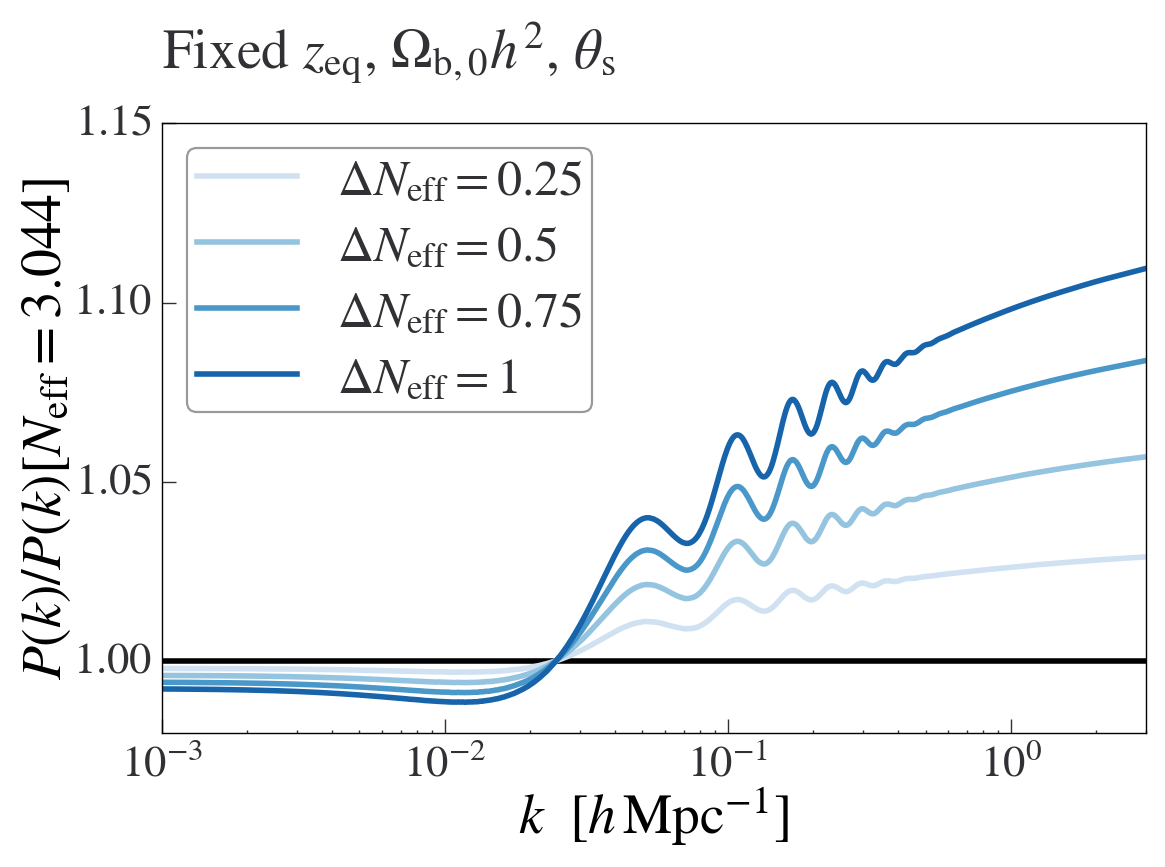

In [5]:
#############################################
#
# arrays for output
#
kvec = np.logspace(-4,np.log10(3),1000) # kvec in h/Mpc
twopi = 2.*math.pi
#
# Create figures
#
fig_Pk, ax_Pk = plt.subplots()
#
# loop over varying parameter values
#
legarray = []
pkM = {}
#pkM_cb = {}

for i in range(var_num):
    #
    # deal with varying parameters:
    #
    var = var_min + (var_max-var_min)*i/(var_num-1.)
    #
    alpha = (1.+0.2271*var)/(1.+0.2271*3.046)
    var2 = (0.022032 + 0.12038)*alpha - 0.022032
    var3 = 0.67556*math.sqrt(alpha) # this is h
    print (' * Compute with %s=%e, %s=%e, %s=%e'%(var_name,var,var2_name,var2,var3_name,var3))
    #
    # deal with colors and legends
    #
    if i == 0:
        var_color = 'k'
        var_alpha = 1.
    else:
        #var_color = 'r'
        #var_alpha = 1.*i/(var_num-1.)
        print (1.*i/(var_num-1))
        var_color = plt.cm.Blues(0.8*i/(var_num-1))
    #
    # store P(k) for common k values
    #
    pkM[i] = []
    #pkM_cb[i] = []
    khvec = kvec*var3 # This is k in 1/Mpc
    for kh in khvec:
        #pkM[i].append(M[i].pk(kh,0.)) 
        pkM[i].append(M[i].pk(kh,0.)*var3**3) 
        #pkM_cb[i].append(M[i].pk_cb(kh,0.)*var3**3) 
        # M[i].pk(kh,0.) is P(k) in Mpc**3
        # pkM[i] is P(k)in (Mpc/h)**3  
    #    
    # plot P(k)
    #
    if i == 0:
        ax_Pk.semilogx(kvec,np.array(pkM[i])/np.array(pkM[0]),
                       color=var_color,#alpha=var_alpha,
                       linestyle='-')
    else:
        ax_Pk.semilogx(kvec,np.array(pkM[i])/np.array(pkM[0]),
                       color=var_color,#alpha=var_alpha,
                       linestyle='-',
                      label=r'$\Delta N_\mathrm{eff}=%g$'%(var-3.044))
        #ax_Pk.semilogx(kvec,np.array(pkM_cb[i])/np.array(pkM_cb[0]),
        #               color=var_color,#alpha=var_alpha,
        #               linestyle='--')
    #
    # plot C_l^TT
    #
    #if i == 0:
    #    ax_TT.semilogx(ll[i],clTT[i]/clTT[0],
    #                   color=var_color,alpha=var_alpha,linestyle='-')
    #else:    
    #    ax_TT.semilogx(ll[i],clTT[i]/clTT[0],
    #                   color=var_color,alpha=var_alpha,linestyle='-',
    #                  label=r'$\Delta N_\mathrm{eff}=%g$'%(var-3.044))
    #

    
#
# output of P(k) figure
#
ax_Pk.set_xlim([1.e-3,3.])
ax_Pk.set_ylim([0.98,1.15])
ax_Pk.tick_params(axis='both',which='both',direction='in',labelsize=16)
ax_Pk.set_xlabel(r'$k \,\,\,\, [h \, \mathrm{Mpc}^{-1}]$')
ax_Pk.set_ylabel(r'$P(k)/P(k)[N_\mathrm{eff}=3.044]$')
ax_Pk.legend(loc='upper left')
ax_Pk.set_title(r'Fixed $z_{\rm eq}$, $\Omega_{{\rm b},0}h^2$, $\theta_{\rm s}$',fontsize=20)
#ax_Pk.set_rasterized(True)
fig_Pk.tight_layout()
#fig_Pk.savefig('rpp-ratio-%s-Pk.eps' % var_figname,format='eps')#,layout='tight',format='eps')
fig_Pk.savefig('rpp-ratio-%s-Pk2.pdf' % var_figname)
#

 * Compute with N_ur=3.044000e+00, omega_cdm=1.394591e-01, h=6.700000e-01
 * Compute with N_ur=3.294000e+00, omega_cdm=1.394591e-01, h=6.700000e-01
0.25
 * Compute with N_ur=3.544000e+00, omega_cdm=1.394591e-01, h=6.700000e-01
0.5
 * Compute with N_ur=3.794000e+00, omega_cdm=1.394591e-01, h=6.700000e-01
0.75
 * Compute with N_ur=4.044000e+00, omega_cdm=1.394591e-01, h=6.700000e-01
1.0


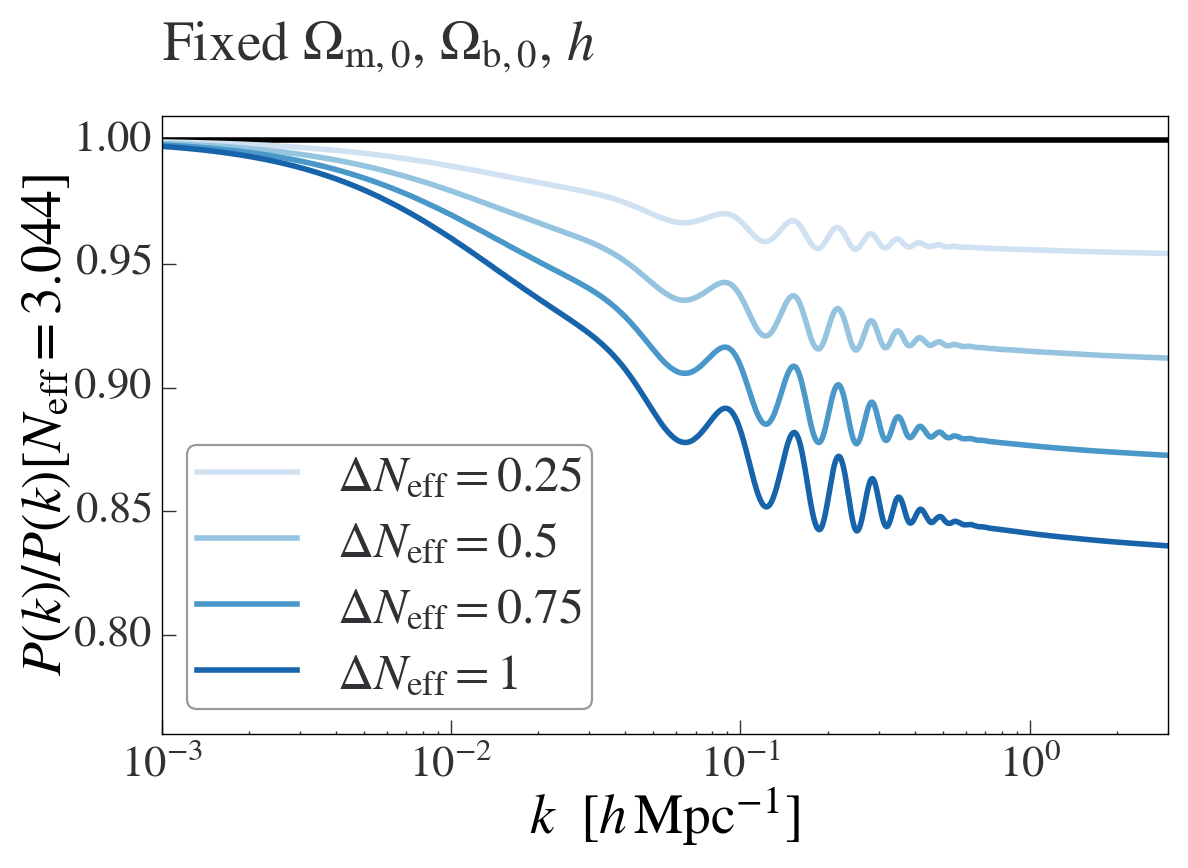

In [6]:
#############################################
#
# arrays for output
#
kvec = np.logspace(-4,np.log10(3),1000) # kvec in h/Mpc
twopi = 2.*math.pi
#
# Create figures
#
fig_Pk, ax_Pk = plt.subplots()
#
# loop over varying parameter values
#
legarray = []
pkM = {}
#pkM_cb = {}

for i in range(var_num):
    #
    # deal with varying parameters:
    #
    var = var_min + (var_max-var_min)*i/(var_num-1.)
    #
    alpha = (1.+0.2271*var)/(1.+0.2271*3.046)
    #var2 = (0.022032 + 0.12038)*alpha - 0.022032
    #var3 = 0.67556*math.sqrt(alpha) # this is h
    var3 = 0.67
    print (' * Compute with %s=%e, %s=%e, %s=%e'%(var_name,var,var2_name,var2,var3_name,var3))
    #
    # deal with colors and legends
    #
    if i == 0:
        var_color = 'k'
        var_alpha = 1.
    else:
        #var_color = 'r'
        #var_alpha = 1.*i/(var_num-1.)
        print (1.*i/(var_num-1))
        var_color = plt.cm.Blues(0.8*i/(var_num-1))
    #
    # store P(k) for common k values
    #
    pkM[i] = []
    #pkM_cb[i] = []
    khvec = kvec*var3 # This is k in 1/Mpc
    for kh in khvec:
        #pkM[i].append(M[i].pk(kh,0.)) 
        pkM[i].append(M2[i].pk(kh,0.)*var3**3) 
        #pkM_cb[i].append(M[i].pk_cb(kh,0.)*var3**3) 
        # M[i].pk(kh,0.) is P(k) in Mpc**3
        # pkM[i] is P(k)in (Mpc/h)**3  
    #    
    # plot P(k)
    #
    if i == 0:
        ax_Pk.semilogx(kvec,np.array(pkM[i])/np.array(pkM[0]),
                       color=var_color,#alpha=var_alpha,
                       linestyle='-')
    else:
        ax_Pk.semilogx(kvec,np.array(pkM[i])/np.array(pkM[0]),
                       color=var_color,#alpha=var_alpha,
                       linestyle='-',
                      label=r'$\Delta N_\mathrm{eff}=%g$'%(var-3.044))
        #ax_Pk.semilogx(kvec,np.array(pkM_cb[i])/np.array(pkM_cb[0]),
        #               color=var_color,#alpha=var_alpha,
        #               linestyle='--')
    #
    # plot C_l^TT
    #
    #if i == 0:
    #    ax_TT.semilogx(ll[i],clTT[i]/clTT[0],
    #                   color=var_color,alpha=var_alpha,linestyle='-')
    #else:    
    #    ax_TT.semilogx(ll[i],clTT[i]/clTT[0],
    #                   color=var_color,alpha=var_alpha,linestyle='-',
    #                  label=r'$\Delta N_\mathrm{eff}=%g$'%(var-3.044))
    #

    
#
# output of P(k) figure
#
ax_Pk.set_xlim([1.e-3,3.])
ax_Pk.set_ylim([0.76,1.01])
ax_Pk.tick_params(axis='both',which='both',direction='in',labelsize=16)
ax_Pk.set_xlabel(r'$k \,\,\,\, [h \, \mathrm{Mpc}^{-1}]$')
ax_Pk.set_ylabel(r'$P(k)/P(k)[N_\mathrm{eff}=3.044]$')
ax_Pk.legend(loc='lower left')
ax_Pk.set_title(r'Fixed $\Omega_{{\rm m},0}$, $\Omega_{{\rm b},0}$, $h$',fontsize=20)
#ax_Pk.set_rasterized(True)
fig_Pk.tight_layout()
#fig_Pk.savefig('rpp-ratio-%s-Pk.eps' % var_figname,format='eps')#,layout='tight',format='eps')
fig_Pk.savefig('rpp-ratio-%s-Pk.pdf' % var_figname)
#